## Filtering and normalization
###### From edgeRUsersGuide()




First let's see if the data loads.

In [13]:
rawdata <- read.delim("RNA-Seq-counts.txt")
head(rawdata)

ID,WCFS1.glc.1,WCFS1.glc.2,WCFS1.rib.1,WCFS1.rib.2,NC8.glc.1,NC8.glc.2,NC8.rib.1,NC8.rib.2
lp_0001,8100,9599,8144,7000,7117,8278,7457,6980
lp_0002,12679,15856,11539,11049,10815,14348,10552,10735
lp_0004,1795,1946,1470,1607,1489,1407,1587,1699
lp_0005,8538,8740,5699,7402,6497,8565,6581,8342
lp_0009,56040,42130,31941,23500,61965,37353,20498,18188
lp_0010,105615,90094,60086,52584,103873,91726,45530,44802


Now we need to initiate edgeR. 
> edgeR stores data in a simple list-based data object called a DGEList. This type of object is
easy to use because it can be manipulated like any list in R. The function readDGE makes a
DGEList object directly. If the table of counts is already available as a matrix or a data.frame,
x say, then a DGEList

So lets use a DGEList i guess.

I think the thing we're doing is Differential gene expression analysis?
> Differential expression analysis means taking the normalised read count data and performing statistical analysis to discover quantitative changes in expression levels between experimental groups.

So we have to normalise the data before we can do stuff. Good thing we're using edgeR
> edgeR is concerned with differential expression analysis rather than with the quantification of
expression levels.




In [35]:
dataAsDGE <- DGEList(counts=rawdata[,2:9], genes=rawdata[1])
dataAsDGE$counts

WCFS1.glc.1,WCFS1.glc.2,WCFS1.rib.1,WCFS1.rib.2,NC8.glc.1,NC8.glc.2,NC8.rib.1,NC8.rib.2
8100,9599,8144,7000,7117,8278,7457,6980
12679,15856,11539,11049,10815,14348,10552,10735
1795,1946,1470,1607,1489,1407,1587,1699
8538,8740,5699,7402,6497,8565,6581,8342
56040,42130,31941,23500,61965,37353,20498,18188
105615,90094,60086,52584,103873,91726,45530,44802
68724,63725,37616,37478,63512,66621,31123,31592
6956,7088,6693,7813,5982,6857,7613,8339
3968,3834,3215,4480,3153,4021,3562,4994
5029,4999,3983,4605,4206,4573,4658,5528


I think this is how we have to normalise the data. 
more about TMM normalisation here https://www.biostars.org/p/269870/

In [39]:
normalised_data <- calcNormFactors(dataAsDGE)
normalised_data

WCFS1.glc.1,WCFS1.glc.2,WCFS1.rib.1,WCFS1.rib.2,NC8.glc.1,NC8.glc.2,NC8.rib.1,NC8.rib.2
8100,9599,8144,7000,7117,8278,7457,6980
12679,15856,11539,11049,10815,14348,10552,10735
1795,1946,1470,1607,1489,1407,1587,1699
8538,8740,5699,7402,6497,8565,6581,8342
56040,42130,31941,23500,61965,37353,20498,18188
105615,90094,60086,52584,103873,91726,45530,44802
68724,63725,37616,37478,63512,66621,31123,31592
6956,7088,6693,7813,5982,6857,7613,8339
3968,3834,3215,4480,3153,4021,3562,4994
5029,4999,3983,4605,4206,4573,4658,5528


I Dont see any differences though

Now we can plot MDS
> Multidimensional scaling (MDS) is a means of visualizing the level of similarity of individual cases of a dataset. MDS is used to translate "information about the pairwise 'distances' among a set of n objects or individuals" into a configuration of n points mapped into an abstract Cartesian space.

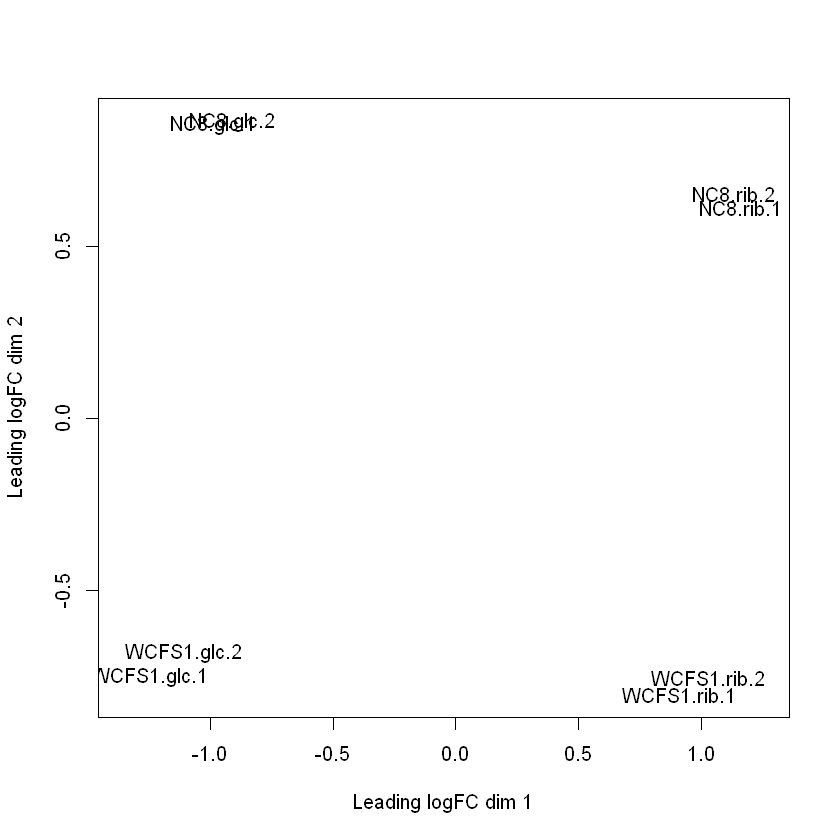

In [37]:
plotMDS(normalised_data)

Now lets estimate the dispersion and plot it using plotBCV
> The square root of dispersion is the coefficient of biological variation

Design matrix not provided. Switch to the classic mode.


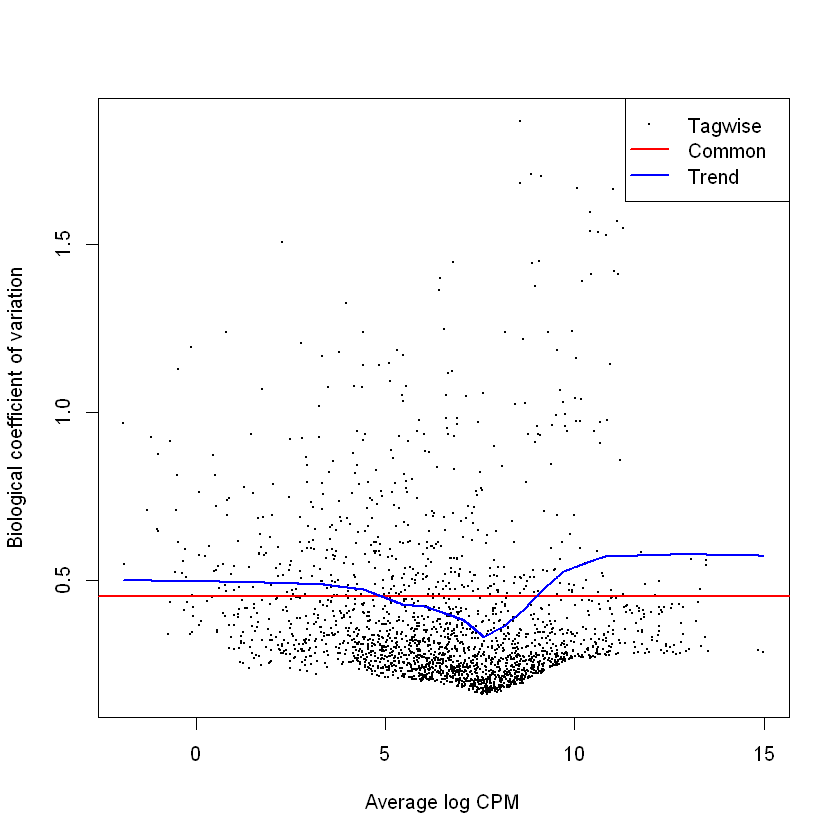

In [47]:
normalised_data_dispersion <- estimateDisp(y)
plotBCV(normalised_data_dispersion)